# <center>Modeling Process For King County Home Price Predictions</center>

**Import Libraries**

In [199]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures
warnings.filterwarnings('ignore')

In [266]:
df = pd.read_csv('kc_house_data_train.csv',index_col = 0)

In [267]:
df.drop(columns=['date'],inplace = True)

In [268]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


# <center>Exploratory Data Analysis</center>

First I'll look to see if there are any null values in my data set.

In [269]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values in the data set, all of my data cleaning will come from finding extreme values and replacing them. While I was examining the data I noticed that our 'bedrooms' feature had some extreme values.

**Bedrooms** 

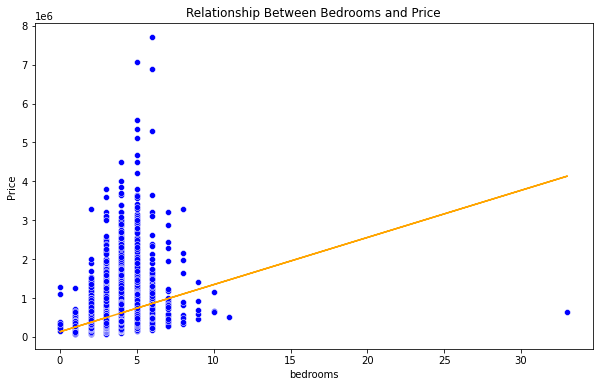

In [270]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="bedrooms", y="price", data=df, color = 'blue')

ax.set(xlabel="bedrooms", ylabel = "Price", title="Relationship Between Bedrooms and Price")


x=df["bedrooms"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

In [271]:
df.bedrooms.value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

I decided to replace the values of 33 and 11 bedrooms. In the code book description it is stated that the 33 bedroom entry was a mistake. I replaced our 11 bedroom home with 4 bedrooms because I was able to google the homes ID and the information I found online stated the home had 4 bedrooms. 

Additionally, there were two homes that were valued over 1 million dollars that had 0 bedrooms. I decided to look up those homes as well and replace those values with the correct information. 

I replaced the other 0 values with 3 because that was the median bedroom value for homes in the same price range as those homes.

In [272]:
df[df['bedrooms']==0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,1222029077,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,7849202190,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,2569500210,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,3918400017,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,1453602309,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,2954400190,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10074,2310060040,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [273]:
df[df['price']<=279295]['bedrooms'].median()

3.0

In [274]:
df['bedrooms'].replace(to_replace=[11,33],value=[4,3],inplace=True)

df['bedrooms'].replace(to_replace=[0],value=[3],inplace=True)

df['bedrooms'] = np.where(df['id'] == 6306400140, 5, df['bedrooms'])

df['bedrooms'] = np.where(df['id'] == 2954400190, 4, df['bedrooms'])

**Bathrooms**

I noticed something similar when examining our bathrooms feature. There were a few homes that had 0 bathrooms listed. I followed a similar process as to the one I explained for my bedrooms variable.

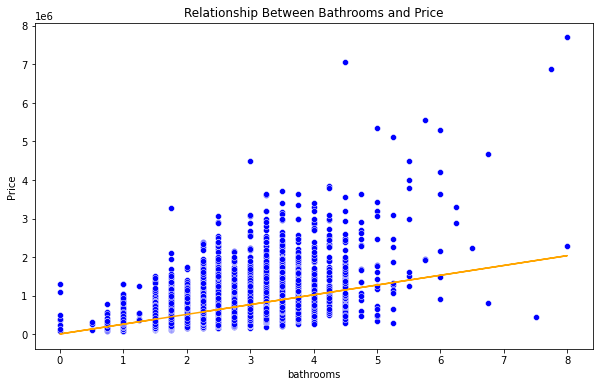

In [275]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="bathrooms", y="price", data=df, color = 'blue')

ax.set(xlabel="bathrooms", ylabel = "Price", title="Relationship Between Bathrooms and Price")


x=df["bathrooms"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

In [276]:
df[df['bathrooms']==0]['price'].median()

367500.0

In [277]:
df[df['price']<=278500]['bathrooms'].median()

1.5

In [278]:
df['bathrooms'] = np.where(df['id'] == 6306400140, 4.5, df['bathrooms'])

df['bathrooms'] = np.where(df['id'] == 2954400190, 4.5, df['bathrooms'])

df['bathrooms'].replace(to_replace=[0],value=[1.5],inplace=True)

# <center>Feature Engineering</center>

In order to maximize the information given to us in this dataset I chose engineer a selection of features to help us better understand their role in determining the price of a home. Below are descriptions of my thought process as to why I made the changes that I did to these variables. 

**Years Old**: Here I am just calculating how old the home is in years


In [279]:
df['years_old'] = 2020- df['yr_built']

In [280]:
df.years_old.value_counts()

6      453
16     360
15     344
14     343
17     337
      ... 
87      27
119     25
118     22
86      19
85      18
Name: years_old, Length: 116, dtype: int64

**New Home:** This is a dummy variable for whether the home is new or not. If the home is new it gets a value of one. If the home is not new it gets a value of zero. 

In [281]:
df['new_home'] = np.where(df['yr_built']>=2013, 1, 0)

No handles with labels found to put in legend.


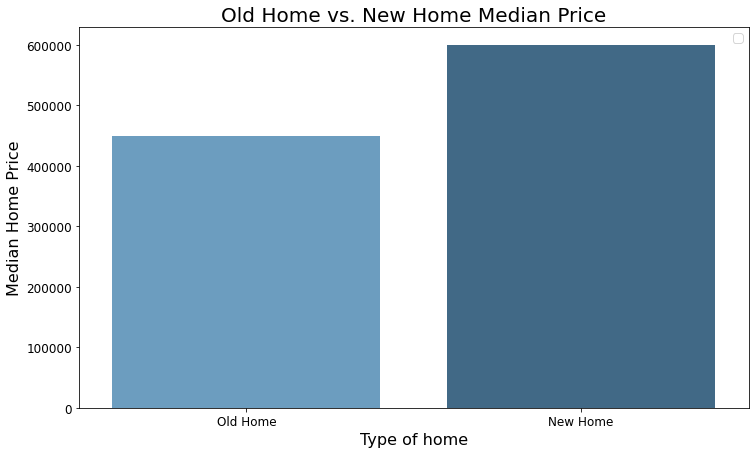

In [282]:
median_old = df[df['new_home']==0]['price'].median()
median_new = df[df['new_home']==1]['price'].median()

y = [median_old,median_new]
x=['Old Home','New Home']

plt.figure(figsize = (12, 7))
ax = sns.barplot(x=x, y=y, data=df,palette="Blues_d")

plt.title("Old Home vs. New Home Median Price", fontsize = 20)
plt.xlabel("Type of home", fontsize = 16)
plt.ylabel("Median Home Price", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)

**Renovated Home:** Here I am generating a variable to determine if the home is renovated or not. If the home is renovated it gets a value of one, if not it gets a value of zero. 

In [283]:
df['renovated_home'] = np.where(df['yr_renovated']>0, 1, 0)

In [375]:
df['renovated_home'].value_counts()

0    16564
1      726
Name: renovated_home, dtype: int64

No handles with labels found to put in legend.


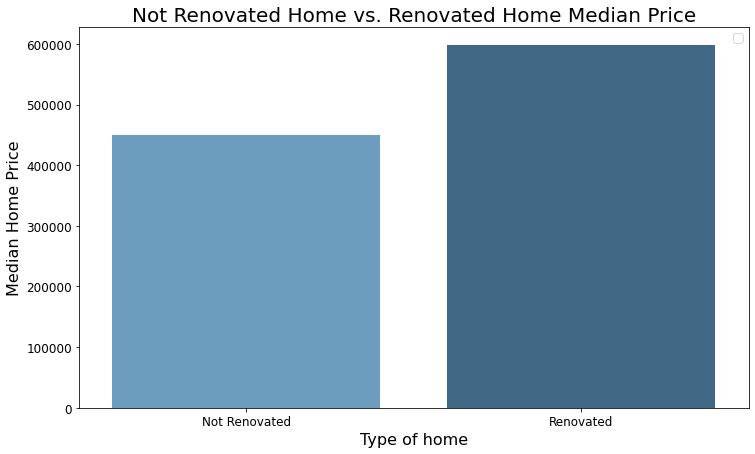

In [374]:
median_notrenovated = df[df['renovated_home']==0]['price'].median()
median_renovated = df[df['renovated_home']==1]['price'].median()

y = [median_notrenovated,median_renovated]
x=['Not Renovated','Renovated']

plt.figure(figsize = (12, 7))
ax = sns.barplot(x=x, y=y, data=df,palette="Blues_d")

plt.title("Not Renovated Home vs. Renovated Home Median Price", fontsize = 20)
plt.xlabel("Type of home", fontsize = 16)
plt.ylabel("Median Home Price", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)

**Calculating Distance between homes and Popular Areas in Seattle**

Here I wanted to see if the distance between the home and popular areas had an impact on price. This function calculates the distance in miles using longitude and latitude. 

In [284]:
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [285]:
df['dist_Ballard'] = haversine(47.677,-122.385, df['lat'].values, df['long'].values)

In [286]:
df['dist_Belltown'] = haversine(47.61322,-122.3465, df['lat'].values, df['long'].values)

In [287]:
df['dist_CapitolHill'] = haversine(47.622942,-122.316456, df['lat'].values, df['long'].values)

In [288]:
df['dist_ChinaTown'] = haversine(47.591830966,-122.31916539, df['lat'].values, df['long'].values)

In [289]:
df['dist_PioneerSqaure'] = haversine(47.6016399,-122.3333457, df['lat'].values, df['long'].values)

In [290]:
df['dist_seattle'] = haversine(47.6062,-122.3321, df['lat'].values, df['long'].values)

In [291]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_old,new_home,renovated_home,dist_Ballard,dist_Belltown,dist_CapitolHill,dist_ChinaTown,dist_PioneerSqaure,dist_seattle
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34,0,0,19.468658,14.810694,14.622612,12.868844,13.803394,14.028259
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43,0,0,4.653348,5.336708,4.102220,6.189626,5.761770,5.449467
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23,0,0,14.229431,10.678290,9.620471,9.061505,9.861970,9.892434
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30,0,0,7.466358,8.121615,6.702984,8.565022,8.352749,8.064683
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16,0,0,14.077589,12.773310,11.244713,12.095439,12.444624,12.282565


**Cities:**

I wanted to create dummy variables that accounted for the city in which the home was located. I figured there were more cities that would be more or less expensive vs. others and that could potentiall give us more accurate results. 

In [292]:
unique_arr = df["zipcode"].unique()

In [293]:
zipcodes = list(unique_arr)

In [294]:
def get_cities(zipcodes):
    from uszipcode import SearchEngine, SimpleZipcode, Zipcode
    search = SearchEngine()
    cities = []
    
    for zc in zipcodes:
        zipcode = search.by_zipcode(zc)
        city = zipcode.major_city
        cities.append(city)
    return cities

In [295]:
get_cities(zipcodes)

['Renton',
 'Seattle',
 'Bellevue',
 'Kirkland',
 'Redmond',
 'Kent',
 'Bellevue',
 'Seattle',
 'Issaquah',
 'Seattle',
 'Seattle',
 'Seattle',
 'Renton',
 'Seattle',
 'Carnation',
 'Renton',
 'Bellevue',
 'Redmond',
 'Woodinville',
 'Seattle',
 'Auburn',
 'Sammamish',
 'Seattle',
 'North Bend',
 'Seattle',
 'Enumclaw',
 'Seattle',
 'Bellevue',
 'Auburn',
 'Mercer Island',
 'Issaquah',
 'Kent',
 'Auburn',
 'Snoqualmie',
 'Renton',
 'Seattle',
 'Seattle',
 'Seattle',
 'Black Diamond',
 'Sammamish',
 'Seattle',
 'Kent',
 'Seattle',
 'Federal Way',
 'Kenmore',
 'Seattle',
 'Maple Valley',
 'Seattle',
 'Seattle',
 'Seattle',
 'Seattle',
 'Bellevue',
 'Woodinville',
 'Seattle',
 'Bothell',
 'Seattle',
 'Seattle',
 'Seattle',
 'Kirkland',
 'Federal Way',
 'Seattle',
 'Seattle',
 'Duvall',
 'Seattle',
 'Kent',
 'Seattle',
 'Seattle',
 'Vashon',
 'Fall City',
 'Medina']

In [296]:
conditions = [
   df['zipcode'].values == 98058,
 df['zipcode'].values == 98115,
 df['zipcode'].values ==98006,
 df['zipcode'].values ==98034,
 df['zipcode'].values ==98052,
 df['zipcode'].values ==98031,
 df['zipcode'].values ==98007,
 df['zipcode'].values ==98199,
 df['zipcode'].values ==98027,
 df['zipcode'].values ==98119,
 df['zipcode'].values ==98122,
 df['zipcode'].values ==98155,
 df['zipcode'].values ==98055,
 df['zipcode'].values ==98118,
 df['zipcode'].values ==98014,
 df['zipcode'].values ==98059,
 df['zipcode'].values ==98004,
df['zipcode'].values == 98053,
df['zipcode'].values == 98072,
df['zipcode'].values == 98133,
df['zipcode'].values == 98092,
df['zipcode'].values == 98074,
df['zipcode'].values == 98125,
df['zipcode'].values == 98045,
df['zipcode'].values == 98106,
df['zipcode'].values == 98022,
df['zipcode'].values == 98177,
df['zipcode'].values == 98008,
df['zipcode'].values == 98002,
df['zipcode'].values == 98040,
df['zipcode'].values == 98029,
df['zipcode'].values == 98042,
 df['zipcode'].values ==98001,
df['zipcode'].values == 98065,
df['zipcode'].values == 98056,
 df['zipcode'].values ==98144,
df['zipcode'].values == 98188,
df['zipcode'].values == 98109,
 df['zipcode'].values ==98010,
 df['zipcode'].values ==98075,
 df['zipcode'].values ==98198,
df['zipcode'].values == 98030,
df['zipcode'].values == 98105,
df['zipcode'].values == 98023,
df['zipcode'].values == 98028,
 df['zipcode'].values ==98112,
df['zipcode'].values == 98038,
df['zipcode'].values == 98116,
df['zipcode'].values == 98103,
df['zipcode'].values == 98178,
df['zipcode'].values == 98168,
df['zipcode'].values == 98005,
df['zipcode'].values == 98077,
df['zipcode'].values == 98146,
df['zipcode'].values == 98011,
 df['zipcode'].values ==98126,
df['zipcode'].values == 98108,
df['zipcode'].values == 98136,
df['zipcode'].values == 98033,
df['zipcode'].values == 98003,
df['zipcode'].values == 98117,
 df['zipcode'].values ==98107,
df['zipcode'].values == 98019,
df['zipcode'].values == 98102,
df['zipcode'].values == 98032,
df['zipcode'].values == 98148,
df['zipcode'].values == 98166,
 df['zipcode'].values ==98070,
df['zipcode'].values == 98024,
 df['zipcode'].values ==98039
]

choices = [
 'Renton',
 'Seattle',
 'Bellevue',
 'Kirkland',
 'Redmond',
 'Kent',
 'Bellevue',
 'Seattle',
 'Issaquah',
 'Seattle',
 'Seattle',
 'Seattle',
 'Renton',
 'Seattle',
 'Carnation',
 'Renton',
 'Bellevue',
 'Redmond',
 'Woodinville',
 'Seattle',
 'Auburn',
 'Sammamish',
 'Seattle',
 'North Bend',
 'Seattle',
 'Enumclaw',
 'Seattle',
 'Bellevue',
 'Auburn',
 'Mercer Island',
 'Issaquah',
 'Kent',
 'Auburn',
 'Snoqualmie',
 'Renton',
 'Seattle',
 'Seattle',
 'Seattle',
 'Black Diamond',
 'Sammamish',
 'Seattle',
 'Kent',
 'Seattle',
 'Federal Way',
 'Kenmore',
 'Seattle',
 'Maple Valley',
 'Seattle',
 'Seattle',
 'Seattle',
 'Seattle',
 'Bellevue',
 'Woodinville',
 'Seattle',
 'Bothell',
 'Seattle',
 'Seattle',
 'Seattle',
 'Kirkland',
 'Federal Way',
 'Seattle',
 'Seattle',
 'Duvall',
 'Seattle',
 'Kent',
 'Seattle',
 'Seattle',
 'Vashon',
 'Fall City',
 'Medina'
]


df['cities'] = np.select(conditions, choices, default='NA')

In [297]:
df['cities'].value_counts()

Seattle          7176
Renton           1304
Bellevue         1110
Kent              942
Redmond           798
Kirkland          790
Auburn            727
Sammamish         644
Federal Way       634
Issaquah          582
Maple Valley      455
Woodinville       377
Snoqualmie        249
Mercer Island     229
Kenmore           219
Enumclaw          189
North Bend        176
Bothell           163
Duvall            145
Carnation         101
Vashon             99
Black Diamond      74
Fall City          65
Medina             42
Name: cities, dtype: int64

In [298]:
cities = pd.get_dummies(df['cities'])
df = pd.concat([df,cities],axis=1)

In [299]:
df.rename(columns={'Federal Way':'Federal_Way','Maple Valley':'Maple_Valley','Mercer Island':'Mercer_Island','North Bend':'North_Bend','Black Diamond':'Black_Diamond','Fall City':'Fall_City'},inplace=True)

No handles with labels found to put in legend.


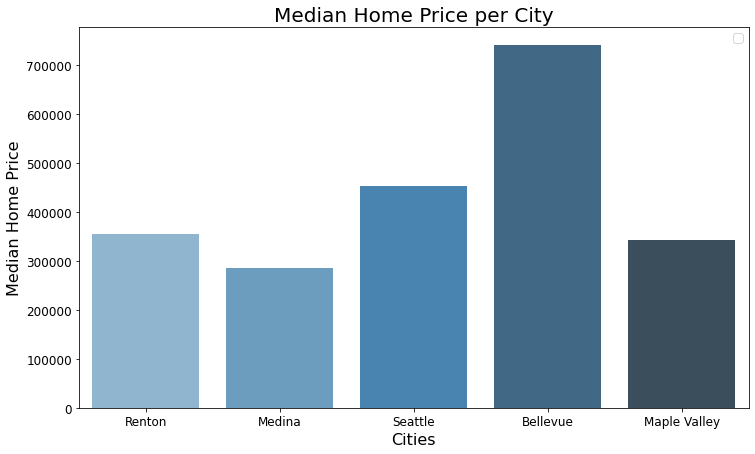

In [300]:
renton = df[df['cities'] == 'Renton']['price'].median()
medina = df[df['cities'] == 'Kent']['price'].median()
seattle = df[df['cities'] == 'Seattle']['price'].median()
bellevue = df[df['cities'] == 'Bellevue']['price'].median()
maplevalley = df[df['cities'] == 'Maple Valley']['price'].median()

med_prce = [renton, medina,seattle,bellevue,maplevalley]
ctys = ['Renton','Medina','Seattle','Bellevue','Maple Valley']

plt.figure(figsize = (12, 7))
ax = sns.barplot(x=ctys, y=med_prce, data=df,palette="Blues_d")

plt.title("Median Home Price per City", fontsize = 20)
plt.xlabel("Cities", fontsize = 16)
plt.ylabel("Median Home Price", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)

**Polynomial Features**

I wanted to create polynomial features to account for any relationships among the features that could better improve the model. 

In [303]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'years_old', 'new_home',
       'renovated_home', 'dist_Ballard', 'dist_Belltown', 'dist_CapitolHill',
       'dist_ChinaTown', 'dist_PioneerSqaure', 'dist_seattle', 'cities',
       'Auburn', 'Bellevue', 'Black_Diamond', 'Bothell', 'Carnation', 'Duvall',
       'Enumclaw', 'Fall_City', 'Federal_Way', 'Issaquah', 'Kenmore', 'Kent',
       'Kirkland', 'Maple_Valley', 'Medina', 'Mercer_Island', 'North_Bend',
       'Redmond', 'Renton', 'Sammamish', 'Seattle', 'Snoqualmie', 'Vashon',
       'Woodinville'],
      dtype='object')

In [324]:
features = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'years_old', 'new_home',
       'renovated_home',
            ]

df_features = df[features]

In [325]:
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_data = poly.fit_transform(df_features)

poly_columns = poly.get_feature_names(df_features.columns)

df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [326]:
price = df['price']
df_poly = pd.concat([df_poly,price],axis=1)

In [327]:
target = df['price']

# <center>Statistical Tests</center>

**ANOVA:** I chose to run an ANOVA test on my cities feature to see if there was a statisically significant price difference in homes from city to city

In [125]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'price~cities'
lm = ols(formula, data=df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                sum_sq       df           F  PR(>F)
cities    5.919338e+14     23.0  244.479634     0.0
Residual  1.817583e+15  17266.0         NaN     NaN


The results here indicate that there is a difference in home prices from city to city, because of this we can rejected the null hypothesis that there is no difference in home prices from city to city.

**Two Sample T Test:** After engineering my renovated_home feature I wanted to test whether there was a statisically significant difference between renovated home prices and non-renovated home prices. 

In [128]:
renovated = df[df['renovated_home']==1]['price']
not_renovated = df[df['renovated_home']==0]['price']
p_val= stats.ttest_ind(renovated, not_renovated, equal_var=False)[1]

alpha = .05

print("Renovated vs Not Renovated T-test P Value: ", p_val)

Renovated vs Not Renovated T-test P Value:  6.478917377975333e-20


These results indicated that there is a a statically signicant difference in renovated home prices vs. not renovated home prices. We can rejected the null hypothesis that there is no difference in home prices of these two groups.

**Two Sample T Test:** After engineering my new_home feature I wanted to test whether there was a statisically significant difference between new homes prices and not new homes prices.

In [372]:
new_home = df[df['new_home']==1]['price']
not_new_home = df[df['new_home']==0]['price']
p_val= stats.ttest_ind(waterfront, not_waterfront, equal_var=False)[1]

alpha = .05

print("New Home vs Not a New Home T-test P Value: ", p_val)

New Home vs Not a New Home T-test P Value:  6.940441256090536e-23


These results indicated that there is a a statically signicant difference in new home prices vs. not new home prices. We can rejected the null hypothesis that there is no difference in the home prices of these two groups.

**ANOVA:** Lastly, I wanted to see where the condition of the home had a statistically significant impact on the price of the home.

In [303]:
formula = 'price~condition'
lm = ols(formula, data=df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                 sum_sq       df          F    PR(>F)
condition  3.139905e+12      1.0  22.557844  0.000002
Residual   2.406377e+15  17288.0        NaN       NaN


The results do indicate the the condition of the home has a statistically significant impact on the price of the home. We can reject the null hypothesis that the condition of the home has no impact on the price of the home. 

# <center>Feature Selection</center>

**Baseline Model**

I wanted to look at a quick summary of my baseline model before started the feature selection process in order to get an idea of how my features are impacting price. 

In [310]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+dist_Ballard+dist_Belltown+dist_CapitolHill+dist_ChinaTown+dist_PioneerSqaure+dist_seattle+Auburn+Bellevue+Black_Diamond+Bothell+Carnation+Duvall+Enumclaw+Fall_City+Federal_Way+Issaquah+Kenmore+Kent+Kirkland+Maple_Valley+Medina+Mercer_Island+North_Bend+Redmond+Renton+Sammamish+Seattle+Snoqualmie+Vashon+Woodinville'
model = ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1515.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        06:12:13   Log-Likelihood:            -2.3317e+05
No. Observations:               17290   AIC:                         4.664e+05
Df Residuals:                   17248   BIC:                         4.668e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.494e+06   1.43e+05     10.449      0.000    1.21e+06    1.77e+06
bedrooms           -3.494e+04   1915.726    -18.241      0.000   -3.87e+04   -3.12e+04
bathrooms           2.479e+04   3177.647      7.802      0.000    1.86e+04     3.1e+04
sqft_living          122.9010      2.089     58.833      0.000     118.806     126.996
sqft_lot               0.1790      0.034      5.210      0.000       0.112       0.246
floors             -4.503e+04   3738.840    -12.044      0.000   -5.24e+04   -3.77e+04
waterfront           6.49e+05   1.66e+04     39.116      0.000    6.16e+05    6.82e+05
view                5.307e+04   2051.424     25.871      0.000    4.91e+04    5.71e+04
condition           2.583e+04   2298.749     11.237      0.000    2.13e+04    3.03e+04
grade               6.012e+04   2108.612     28.510      0.000     5.6e+04    6.42e+04
sqft_above           104.1893      2.180     47.791      0.000      99.916     108.463
sqft_basement         18.7116      2.610      7.169      0.000      13.596      23.828
yr_built            -835.8390     77.216    -10.825      0.000    -987.190    -684.488
yr_renovated          20.6795      3.556      5.815      0.000      13.709      27.650
dist_Ballard        4.843e+04   2076.831     23.319      0.000    4.44e+04    5.25e+04
dist_Belltown      -2.151e+05   2.69e+04     -7.986      0.000   -2.68e+05   -1.62e+05
dist_CapitolHill   -1.004e+05   1.64e+04     -6.123      0.000   -1.33e+05   -6.83e+04
dist_ChinaTown       5.43e+04   2.24e+04      2.424      0.015    1.04e+04    9.82e+04
dist_PioneerSqaure  5.354e+04    8.9e+04      0.602      0.547   -1.21e+05    2.28e+05
dist_seattle        1.414e+05   9.69e+04      1.460      0.144   -4.85e+04    3.31e+05
Auburn              4.735e+04   9804.442      4.830      0.000    2.81e+04    6.66e+04
Bellevue            9.723e+04   9909.792      9.812      0.000    7.78e+04    1.17e+05
Black_Diamond       1.532e+05   2.12e+04      7.237      0.000    1.12e+05    1.95e+05
Bothell            -1.438e+05   1.53e+04     -9.410      0.000   -1.74e+05   -1.14e+05
Carnation           7.649e+04   1.86e+04      4.120      0.000    4.01e+04    1.13e+05
Duvall             -2.135e+04   1.57e+04     -1.357      0.175   -5.22e+04    9490.192
Enumclaw            2.097e+05   1.69e+04     12.373      0.000    1.76e+05    2.43e+05
Fall_City           1.075e+05    2.2e+04      4.896      0.000    6.45e+04    1.51e+05
Federal_Way         1.015e+04   1.02e+04      0.997      0.319   -9800.514    3.01e+04
Issaquah            5.746e+04   9767.848      5.882      0.000    3.83e+04    7.66e+04
Kenmore            -1.591e+05    1.4e+04    -11.368      0.000   -1.87e+05   -1.32e+05
Kent               -3831.9248   8828.695     -0.434      0.664   -2.11e+04    1.35e+04
Kirkland           -6.323e+04   1.06e+

**Train Test Split With Polynomial Data**

Here I am seeing how well my polynomial data fits in terms of trying to predict home prices. 

In [346]:
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

**Training Set**

In [347]:
lr = LinearRegression()

lr = lr.fit(X_train, y_train)

In [348]:
trn_predict = lr.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train,trn_predict))

**Testing Set**

In [349]:
tst_predict = lr.predict(X_test)

In [350]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test,tst_predict))

In [351]:
print('Training RMSE: ', train_rmse, "vs. Testing RMSE: ", test_rmse)

Training RMSE:  2.8684384348246537e-06 vs. Testing RMSE:  3.701122733285186e-06


**Select KBest** 

In [352]:
selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7fb9e1b1eaf0>)

In [353]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [354]:
selected_columns

Index(['sqft_living', 'grade', 'bathrooms sqft_living', 'bathrooms sqft_above',
       'sqft_living^2', 'sqft_living condition', 'sqft_living grade',
       'sqft_living sqft_above', 'sqft_living yr_built', 'sqft_living zipcode',
       'sqft_living lat', 'sqft_living long', 'sqft_living sqft_living15',
       'grade^2', 'grade sqft_above', 'grade zipcode', 'grade lat',
       'grade long', 'grade sqft_living15', 'price'],
      dtype='object')

In [355]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 6.663375084790422e-10
Testing Root Mean Squared Error: 6.321805235859271e-10


The results indicate that there is a lot of room for error in my predictions. Since these RMSE results are elevated I decided to try other feature selection methods to improve the results of my model.

**Recursive Feature Elimination**

In [340]:
ols = LinearRegression()

In [341]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
F

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [342]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [343]:
selected_rfe

Index(['bedrooms waterfront', 'bathrooms waterfront',
       'bathrooms renovated_home', 'waterfront view', 'waterfront lat',
       'waterfront new_home', 'waterfront renovated_home', 'price'],
      dtype='object')

In [344]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 1.966082878457677e-10
Testing Root Mean Squared Error: 1.9896013266126773e-10


In [345]:
lm_rfe.coef_

array([-1.63799522e-10,  1.54433647e-10, -5.20193471e-11,  7.24856140e-11,
        1.32293449e-11, -1.40134937e-09, -9.42564302e-11,  1.00000000e+00])

The results from Recursive Feature Elimination proved to be much stronger in this instance. The difference in error is minimal which indicates that the model doesn't overfit the training data. These results have been most successful so far.

**Testing all my Features without any polynomials**

After looking at the summary from my baseline model I wanted to try and test how well these features worked on their own in making predictions. Since my baseline model sugessted that my variables explained close to 80% of the variance within the data, and since a lot of my features were statisically signifcant I figured I would test their prediction ability. 

In [359]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'years_old', 'new_home',
       'renovated_home', 'dist_Ballard', 'dist_Belltown', 'dist_CapitolHill',
       'dist_ChinaTown', 'dist_PioneerSqaure', 'dist_seattle', 'cities',
       'Auburn', 'Bellevue', 'Black_Diamond', 'Bothell', 'Carnation', 'Duvall',
       'Enumclaw', 'Fall_City', 'Federal_Way', 'Issaquah', 'Kenmore', 'Kent',
       'Kirkland', 'Maple_Valley', 'Medina', 'Mercer_Island', 'North_Bend',
       'Redmond', 'Renton', 'Sammamish', 'Seattle', 'Snoqualmie', 'Vashon',
       'Woodinville'],
      dtype='object')

In [360]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'years_old', 'new_home',
       'renovated_home', 'Auburn', 'Bellevue', 'Black_Diamond', 'Bothell',
       'Carnation', 'Duvall', 'Enumclaw', 'Fall_City', 'Federal_Way',
       'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Maple_Valley', 'Medina',
       'Mercer_Island', 'North_Bend', 'Redmond', 'Renton', 'Sammamish',
       'Seattle', 'Snoqualmie', 'Vashon', 'Woodinville', 'dist_Ballard',
       'dist_Belltown', 'dist_CapitolHill', 'dist_ChinaTown',
       'dist_PioneerSqaure', 'dist_seattle']

In [361]:
df_features = df[features]

In [362]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.2)

In [363]:
ols = LinearRegression()

I ran these variables through RFE to see whether or not any features would get eliminated. 

In [364]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

Fitting estimator with 51 features.


RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', verbose=1)

In [365]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [366]:
sc_final = selected_rfe

In [367]:
sc_final

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'years_old', 'new_home', 'renovated_home', 'Auburn',
       'Bellevue', 'Black_Diamond', 'Bothell', 'Carnation', 'Duvall',
       'Enumclaw', 'Fall_City', 'Federal_Way', 'Issaquah', 'Kenmore', 'Kent',
       'Kirkland', 'Maple_Valley', 'Medina', 'Mercer_Island', 'North_Bend',
       'Redmond', 'Renton', 'Sammamish', 'Seattle', 'Snoqualmie', 'Vashon',
       'Woodinville', 'dist_Ballard', 'dist_Belltown', 'dist_CapitolHill',
       'dist_ChinaTown', 'dist_PioneerSqaure', 'dist_seattle'],
      dtype='object')

In [368]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 171747.6163097001
Testing Root Mean Squared Error: 178539.50030755196


Given the results, I decided to use this as my final model. The Training RMSE and Testing RMSE are close in difference, suggesting my model does not overfit my training data. Additionally, this is the lowest error I recieved from running my models. Because of these factors I chose this model to make my final predictions.

**Saving my Final Model**

In [369]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(df[sc_final],df['price'])

In [261]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [259]:
pickle_out = open("selected_columns.pickle","wb")
pickle.dump(selected_columns, pickle_out)
pickle_out.close()